<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv(r'D:\Python Projects\DeepLearning School\Kaggle task\train.csv')

In [4]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

# Если искать типы данных по колонкам самостоятельно, то значения переменных 
# cat_cols, num_cols будут отличатся от того, что уже есть.
# num_cols = [col for col in data.columns if data[col].dtypes in ['int64', 'float64']]
# cat_cols = [col for col in data.columns if data[col].dtypes == 'object']

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Можем увидеть, что колонка TotalSpent имеет тип object: там находятся числа, но в виде строки, более того там есть пустые строки, поэтому чтобы нам можно было использовать эти значения дальше, то мы переведем значения от типа **object -> float**, но сначала заменим пустые строки на 0

In [7]:
# data[pd.to_numeric(data['TotalSpent'], errors='coerce').isnull()]
data['TotalSpent'].value_counts()

20.2       9
           9
19.75      8
19.65      6
20.05      6
          ..
4145.25    1
998.1      1
8306.05    1
607.7      1
1274.45    1
Name: TotalSpent, Length: 4978, dtype: int64

In [8]:
data['TotalSpent'].replace(' ', 0, inplace=True)
data['TotalSpent'] = data['TotalSpent'].astype('float64')
# data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [10]:
data[data['TotalSpent'].isnull()]['TotalSpent']

Series([], Name: TotalSpent, dtype: float64)

Попробуем вместо 0 заменить пустые строчки на **Медианное, Среднее и моду**, может это даст прирост в точности

In [12]:
# median_value = data['TotalSpent'].median()
# mean_value = data['TotalSpent'].mean()
# mode_value = data['TotalSpent'].mode()
# data['TotalSpent'].fillna(data['TotalSpent'].mode()[0], inplace=True)

**Медианное значение** дало точность на CatBoost'e со стандартными параметрами: **0.8509**  
**Среднее значение** дало точность на CatBoost'e со стандартными параметрами: **0.8518**  
**Мода** дала точность на CatBoost'e со стандартными параметрами: **0.8522**  
В итоге никакая из этих замен не повысила точность 

In [11]:
# YOUR CODE
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


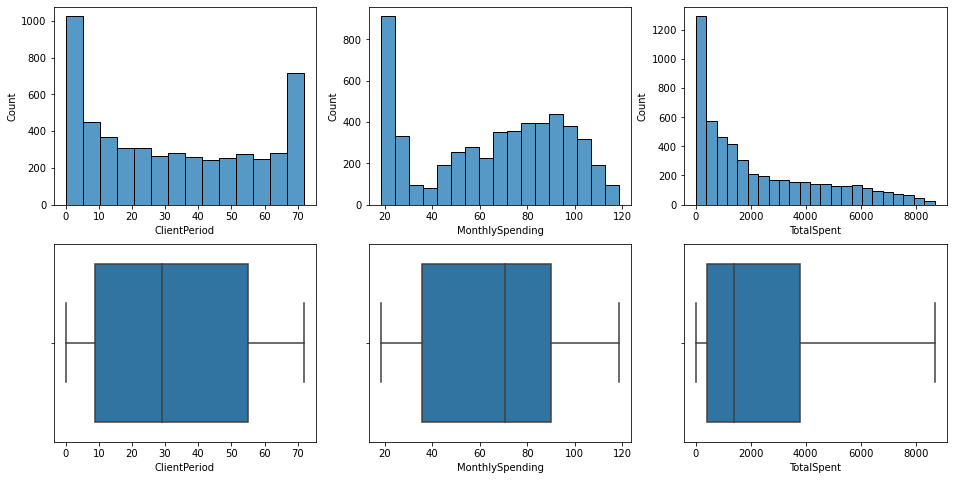

In [12]:
# YOUR CODE
import seaborn as sns
fig, axes = plt.subplots(2, len(num_cols), figsize=(16,8))
axes = axes.ravel()
for i, column in enumerate(data[num_cols]):
    sns.histplot(data[column], ax=axes[i])
    sns.boxplot(data[column], ax=axes[i+3])

In [13]:
len(cat_cols)

16

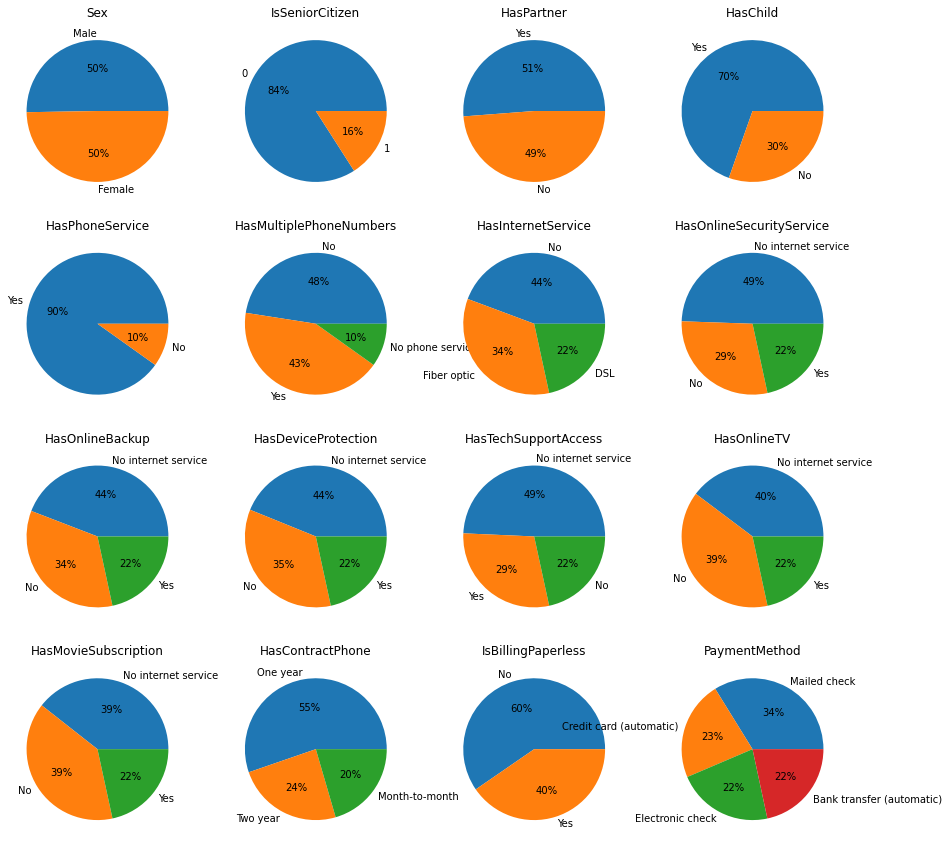

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(15,15))
axes = axes.ravel()
for i, column in enumerate(data[cat_cols]):
    axes[i].pie(x=data[column].value_counts(), labels=data[column].unique(), autopct='%.0f%%')
    axes[i].set(title = column)

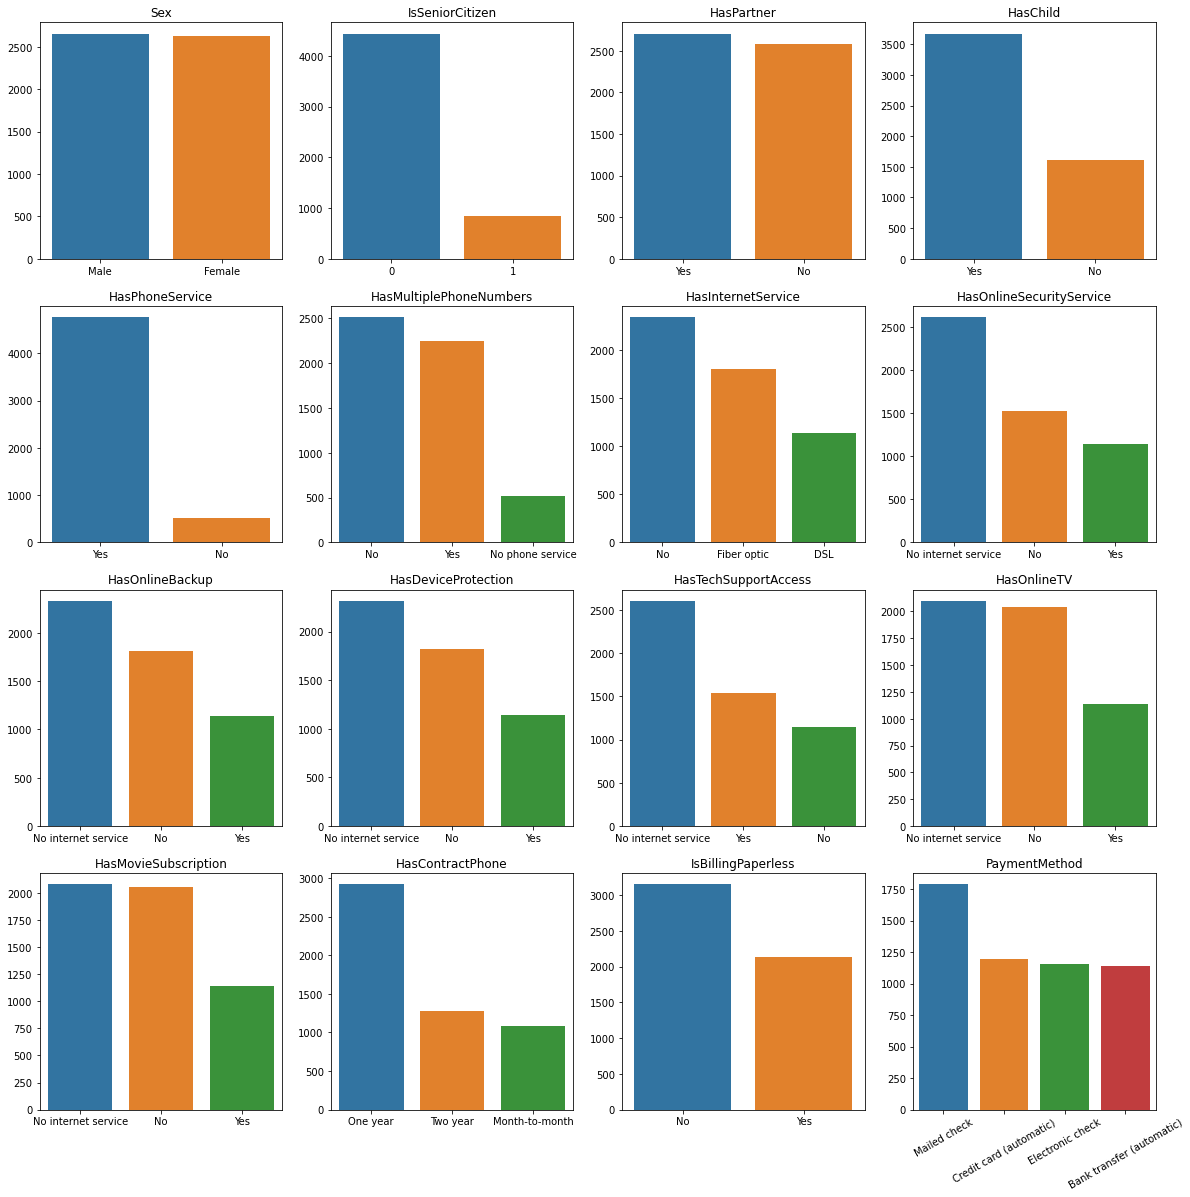

In [15]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.ravel()
for i, column in enumerate(data[cat_cols]):
    plot = sns.barplot(x=data[column].unique(), y=data[column].value_counts(), ax=axes[i])
    plot.set_title(column)
    plot.set_ylabel('')
    if i == 15:
        plot.set_xticklabels(labels=data[column].unique(), rotation=30)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных кvalue_counts но не за баллы.

In [16]:
# YOUR CODE
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,0.159409,0.262022
std,24.550326,30.176464,2269.049195,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [17]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [18]:
X = data[feature_cols]
y = data[target_col]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [20]:
# ohe = OneHotEncoder()
# X_train_prep = ohe.fit_transform(X_train[cat_cols])
# X_test_prep = ohe.transform(X_test[cat_cols])

# ohe_pipe = make_pipeline(OneHotEncoder())
# ohe_pipe.fit_transform(X_train[cat_cols])

In [21]:
num_cols

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

# Более простой вариант 

In [22]:
num_feat = make_pipeline(StandardScaler())
categ_feat = make_pipeline(OneHotEncoder())
preprocessor = ColumnTransformer(transformers=[('num', num_feat, num_cols),
                                               ('categ', categ_feat, cat_cols)])
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [23]:
lr = LogisticRegressionCV(cv=3, scoring='roc_auc', random_state=0, refit=True)
lr.fit(X_train_prep, y_train)

LogisticRegressionCV(cv=3, random_state=0, scoring='roc_auc')

In [24]:
y_pred = lr.predict_proba(X_test_prep)[:, 1]
roc_auc_score(y_test, y_pred)

0.8450155079588014

Попробуем вместо OneHotEncoding'a использовать **pd.get_dummies**

In [24]:
#Размерность датасета до применения get_dummies
# data.shape

In [71]:
# categ_dum = pd.get_dummies(data[cat_cols])
# new_data = pd.concat([data[num_cols], categ_dum, data[target_col]], axis=1)

In [25]:
#Разменость датасета после применения get_dummies
# new_data.shape

In [26]:
# X_dum = new_data.drop('Churn', axis=1)
# y_dum = new_data['Churn']

In [28]:
# dum_num_feat = make_pipeline(StandardScaler())
# X_dum_train_scaled = dum_num_feat.fit_transform(X_dum_train)
# X_dum_test_scaled = dum_num_feat.transform(X_dum_test)

In [29]:
# X_dum_scaled = dum_num_feat.fit_transform(X_dum)

In [30]:
# X_dum_train, X_dum_test, y_dum_train, y_dum_test = train_test_split(X_dum, y_dum, test_size=0.2, random_state=17)

In [31]:
# lr_dum = LogisticRegressionCV(cv=5, fit_intercept=True, scoring='roc_auc', n_jobs=-1, random_state=17, refit=True)
# lr_dum.fit(X_dum_scaled, y_dum)
# roc_auc_score(y_dum_test, lr_dum.predict_proba(X_dum_test_scaled)[:, 1])

Как видно прирост не совсем большой: на **0.0001**  
Без разбиения на train/test удалось увеличить тоность на **0.0049** по сравнению с "легким" вариантом, и на **0.0009** по сравнению со "сложным" вариантом

# Вариант с объединением в один Pipeline 

In [25]:
num_feat = make_pipeline(StandardScaler())
categ_feat = make_pipeline(OneHotEncoder())
preprocessor = ColumnTransformer(transformers=[('num', num_feat, num_cols),
                                               ('categ', categ_feat, cat_cols)])

# lr_pipe = make_pipeline(preprocessor, LogisticRegression(random_state=17))
lr_pipe = Pipeline([('prep', preprocessor), ('lr', LogisticRegression(random_state=42))])
grid = GridSearchCV(lr_pipe, {'lr__C': [100, 10, 1, 0.1, 0.01, 0.001]}, scoring='roc_auc')


In [26]:
# YOUR CODE
grid.fit(X, y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('categ',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [27]:
roc_auc_score(y, grid.predict_proba(X)[:, 1])

0.8490560039682422

In [28]:
grid.best_params_

{'lr__C': 100}

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [29]:
# pip install catboost

## Сначала обучим моедель со стандартными параметрами

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [31]:
# YOUR CODE
import catboost 
#Разделение выборки на train/valid производилось раньше, поэтому еще раз делать этого не нужно
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)
boosting_model.fit(X_train, y_train)

Learning rate set to 0.019062
0:	learn: 0.6802725	total: 278ms	remaining: 4m 38s
1:	learn: 0.6687928	total: 327ms	remaining: 2m 43s
2:	learn: 0.6577864	total: 362ms	remaining: 2m
3:	learn: 0.6465331	total: 423ms	remaining: 1m 45s
4:	learn: 0.6359511	total: 459ms	remaining: 1m 31s
5:	learn: 0.6268034	total: 491ms	remaining: 1m 21s
6:	learn: 0.6174913	total: 534ms	remaining: 1m 15s
7:	learn: 0.6089883	total: 567ms	remaining: 1m 10s
8:	learn: 0.6026484	total: 579ms	remaining: 1m 3s
9:	learn: 0.5942859	total: 616ms	remaining: 1m
10:	learn: 0.5862790	total: 650ms	remaining: 58.5s
11:	learn: 0.5789314	total: 702ms	remaining: 57.8s
12:	learn: 0.5717264	total: 740ms	remaining: 56.2s
13:	learn: 0.5647598	total: 776ms	remaining: 54.7s
14:	learn: 0.5584012	total: 811ms	remaining: 53.3s
15:	learn: 0.5524215	total: 841ms	remaining: 51.7s
16:	learn: 0.5464409	total: 877ms	remaining: 50.7s
17:	learn: 0.5406233	total: 933ms	remaining: 50.9s
18:	learn: 0.5353709	total: 971ms	remaining: 50.1s
19:	learn:

In [32]:
y_predicted = boosting_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_predicted)

0.8531937617041199

In [33]:
boosting_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorde

Просто обучив стандартную модель градиентного бустинга, мы получили значение метрики ROC-AUC выше, чем у модели логистической регрессии 

## А теперь попробуем поиграться с некоторыми параметрами CatBoost'a

In [40]:
params = {'n_estimators': [100, 500, 100], 
          'learning_rate': [0.001, 0.01, 0.1, 1], 
          'depth': [3, 6, 9]}
boosting_grid = GridSearchCV(catboost.CatBoostClassifier(cat_features=cat_cols), param_grid=params, n_jobs=-1, cv=5, scoring='roc_auc')
boosting_grid.fit(X_train, y_train)

0:	learn: 0.6600281	total: 8.97ms	remaining: 888ms
1:	learn: 0.6328140	total: 23ms	remaining: 1.13s
2:	learn: 0.6078137	total: 33.8ms	remaining: 1.09s
3:	learn: 0.5880226	total: 43ms	remaining: 1.03s
4:	learn: 0.5713063	total: 57.7ms	remaining: 1.1s
5:	learn: 0.5562098	total: 77.4ms	remaining: 1.21s
6:	learn: 0.5424888	total: 89.7ms	remaining: 1.19s
7:	learn: 0.5316929	total: 118ms	remaining: 1.35s
8:	learn: 0.5226484	total: 132ms	remaining: 1.33s
9:	learn: 0.5113830	total: 145ms	remaining: 1.31s
10:	learn: 0.5023271	total: 158ms	remaining: 1.28s
11:	learn: 0.4935492	total: 197ms	remaining: 1.44s
12:	learn: 0.4864919	total: 213ms	remaining: 1.42s
13:	learn: 0.4794498	total: 227ms	remaining: 1.4s
14:	learn: 0.4729676	total: 242ms	remaining: 1.37s
15:	learn: 0.4679170	total: 254ms	remaining: 1.33s
16:	learn: 0.4634916	total: 268ms	remaining: 1.31s
17:	learn: 0.4584566	total: 296ms	remaining: 1.35s
18:	learn: 0.4542350	total: 310ms	remaining: 1.32s
19:	learn: 0.4502285	total: 350ms	remain

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000025F11A8F8B0>,
             n_jobs=-1,
             param_grid={'depth': [3, 6, 9],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 500, 100]},
             scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [43]:
boosting_grid.best_params_

{'depth': 3, 'learning_rate': 0.1, 'n_estimators': 100}

In [44]:
ppred = boosting_grid.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, ppred)

0.8493216487203495

Видно, что CatBoost со стандратными параметрами дал наилучшее значение метрики ROC-AUC со значением ~0.85  
**Скор на Kaggle: 0.85115**

In [132]:
params = {'n_estimators': [1000, 2000], 
          'learning_rate': [0.019, 0.195, 0.2], 
          'depth': [6, 7, 8]}
boosting_grid1 = GridSearchCV(catboost.CatBoostClassifier(cat_features=cat_cols), param_grid=params, n_jobs=-1, cv=3, scoring='roc_auc')
boosting_grid1.fit(X_train, y_train)

0:	learn: 0.6803137	total: 24.2ms	remaining: 24.2s
1:	learn: 0.6688689	total: 47.1ms	remaining: 23.5s
2:	learn: 0.6578940	total: 73.2ms	remaining: 24.3s
3:	learn: 0.6466713	total: 98.4ms	remaining: 24.5s
4:	learn: 0.6361160	total: 126ms	remaining: 25s
5:	learn: 0.6269896	total: 148ms	remaining: 24.5s
6:	learn: 0.6176978	total: 175ms	remaining: 24.8s
7:	learn: 0.6092119	total: 201ms	remaining: 25s
8:	learn: 0.6028831	total: 210ms	remaining: 23.1s
9:	learn: 0.5938633	total: 239ms	remaining: 23.6s
10:	learn: 0.5860772	total: 270ms	remaining: 24.3s
11:	learn: 0.5786296	total: 293ms	remaining: 24.1s
12:	learn: 0.5710795	total: 319ms	remaining: 24.2s
13:	learn: 0.5648126	total: 345ms	remaining: 24.3s
14:	learn: 0.5580610	total: 371ms	remaining: 24.3s
15:	learn: 0.5527665	total: 384ms	remaining: 23.6s
16:	learn: 0.5464760	total: 410ms	remaining: 23.7s
17:	learn: 0.5417341	total: 423ms	remaining: 23.1s
18:	learn: 0.5359510	total: 452ms	remaining: 23.3s
19:	learn: 0.5308969	total: 480ms	remaini

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000025F1A413250>,
             n_jobs=-1,
             param_grid={'depth': [6, 7, 8],
                         'learning_rate': [0.019, 0.195, 0.2],
                         'n_estimators': [1000, 2000]},
             scoring='roc_auc')

In [134]:
pred_1 = boosting_grid1.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, pred_1)

0.8524915145131086

# Предсказания

In [52]:
best_model = boosting_model

In [53]:
X_test_boost = pd.read_csv(r'D:\Python Projects\DeepLearning School\Kaggle task\test.csv')
submission = pd.read_csv('D:\Python Projects\DeepLearning School\Kaggle task\submission.csv')

submission['Churn'] =  best_model.predict_proba(X_test_boost)[:, 1]  #best_model.predict(X_test)
submission.to_csv('D:\Python Projects\DeepLearning School\Kaggle task\my_submission.csv', index=False)

Лучшие сабмит на Kaggle **0.85115**

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.